In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [2]:
#cargamos nodos
nodos=pd.read_csv('quakers_nodelist.csv',header=None,
                 names=['Name','HistoricalSignificance','Birthdate','Deathdate','ID','Gender'])
#cargamos aristas
aristas=pd.read_csv('quakers_edgelist.csv',header=None,
                   names=['Source','Target'])

nodos.head(10)

,Name,HistoricalSignificance,Birthdate,Deathdate,ID,Gender
0,Joseph Wyeth,religious writer for you,1663,1731,10013191,male
1,Alexander Skene of Newtyle,local politician and author,1621,1694,10011149,male
2,James Logan,colonial official and scholar,1674,1751,10007567,male
3,Dorcas Erbery,Quaker preacher,1656,1659,10003983,female
4,Lilias Skene,Quaker preacher and poet,1626,1697,10011152,male
5,William Mucklow,religious writer for magazine,1630,1713,10008595,male
6,Thomas Salthouse,Quaker preacher and writer,1630,1691,10010643,male
7,William Dewsbury,Quaker activist,1621,1688,10003478,male
8,John Audland,Quaker preacher,1630,1664,10000411,male
9,Richard Claridge,Quaker minister and schoolmaster,1649,1723,10002469,male


In [3]:
aristas.head(10)

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
5,George Keith,George Fox
6,George Keith,George Whitehead
7,George Keith,William Bradford
8,James Parnel,Benjamin Furly
9,James Parnel,Stephen Crisp


In [4]:
#construimos el grafo
graph = nx.Graph()
#añadimos los nodos
for name,historicalSignificance,gender,birthdate,deathdate,Id in zip(nodos['Name'],nodos['HistoricalSignificance'],nodos['Gender'],nodos['Birthdate'],nodos['Deathdate'],nodos['ID']):
    graph.add_node(name, Name=name,HistoricalSignificance=historicalSignificance,Gender=gender,Birthdate=birthdate,Deathdate=deathdate,Id=Id)
#añadimos las aristas
for source,target in zip(aristas['Source'],aristas['Target']):
    graph.add_edge(source,target)
#print(list(graph.nodes))
#print(list(graph.edges))
#graph.nodes.data()
#graph.edges.data()
#graph.number_of_nodes()

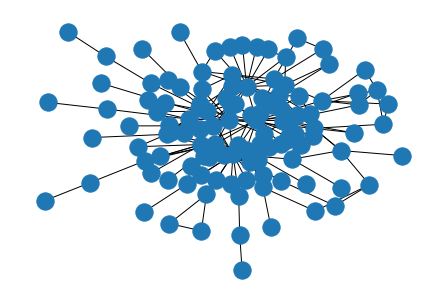

In [5]:
#dibujamos el grafo
nx.draw_kamada_kawai(graph,)
plt.show()

In [6]:
from sklearn import preprocessing

In [7]:
atributos = nodos.loc[:,'Name':'Deathdate']
objetivo = nodos['Gender']

In [8]:
# Para realizar una codificación de los datos, se crea una instancia del tipo de
# codificación pretendida y se ajusta a los datos disponibles mediante el método fit.

codificador_atributos = preprocessing.OrdinalEncoder()
codificador_atributos.fit(atributos)

#Con este comando miras los valores que puede haber cuando el atributo ya esta codificado
#print(codificador_atributos.categories_)

OrdinalEncoder()

In [9]:
# Una vez ajustado el codificador, el método transform permite codificar los
# valores de los atributos
atributos_codificados = codificador_atributos.transform(atributos)
#print(atributos_codificados)

In [10]:
# El codificador adecuado para la variable objetivo es LabelEncoder, que trabaja
# con una lista o array unidimensional de sus valores
codificador_objetivo = preprocessing.LabelEncoder()
# El método fit_transform ajusta la codificación y la aplica a los datos justo
# a continuación
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

In [11]:
# Clases detectadas por el codificador para la variable objetivo
print(codificador_objetivo.classes_)

['female' 'male']


In [12]:
#1 es male, 0 es female
print(objetivo_codificado)
# Las respuestas predichas por los modelos estarán codificadas, pero el codificador
# también permite descodificarlas
print(codificador_objetivo.inverse_transform([1, 0, 1]))

[1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 0]
['male' 'female' 'male']


In [13]:
# Cantidad total de ejemplos
#print(nodos.shape[0])
# Frecuencia total de cada clase de aceptabilidad (porcentaje de cada valor objetivo en nuestro conjunto)
print(pd.Series(objetivo).value_counts(normalize=True))

male      0.815126
female    0.184874
Name: Gender, dtype: float64


In [14]:
from sklearn import model_selection

In [15]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados, objetivo_codificado,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=12345,
        # Tamaño del conjunto de prueba
        test_size=.20,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado)

In [16]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de pruebas requeridos:', 119 * .20)
print('Filas del array de atributos de prueba:', atributos_prueba.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pd.Series(
        codificador_objetivo.inverse_transform(objetivo_prueba)
      ).value_counts(normalize=True))

Cantidad de ejemplos de pruebas requeridos: 23.8
Filas del array de atributos de prueba: 24
Longitud del vector de objetivos de prueba: 24
Proporción de clases en el vector de objetivos de prueba:
male      0.833333
female    0.166667
dtype: float64


In [17]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de entrenamiento requeridos:', 119 * .80)
print('Filas del array de atributos de entrenamiento:', atributos_entrenamiento.shape[0])
print('Longitud del vector de objetivos de entrenamiento:', len(objetivo_entrenamiento))
print('Proporción de clases en el vector de objetivos de entrenamiento:')
print(pd.Series(# Comprobamos que el 
        codificador_objetivo.inverse_transform(objetivo_entrenamiento)
      ).value_counts(normalize=True))

Cantidad de ejemplos de entrenamiento requeridos: 95.2
Filas del array de atributos de entrenamiento: 95
Longitud del vector de objetivos de entrenamiento: 95
Proporción de clases en el vector de objetivos de entrenamiento:
male      0.810526
female    0.189474
dtype: float64


Para realizar aprendizaje supervisado en _sklearn_, basta crear una instancia de la clase de objetos que implemente el modelo que se quiera utilizar (_naive_ Bayes, árboles de decisión, _kNN_, etc.).

Cada una de estas instancias dispondrá de los siguientes métodos:
* El método `fit` permite entrenar el modelo, dados __por separado__ el conjunto de ejemplos de entrenamiento y la clase de cada uno de estos ejemplos.
* El método `predict` permite clasificar un nuevo ejemplo una vez entrenado el modelo.
* El método `score` calcula el rendimiento del modelo, dados __por separado__ el conjunto de ejemplos de prueba y la clase de cada uno de estos ejemplos.

### Random Forest

In [18]:
#Hasta aqui lo he hemos hecho ha sido leer del csv los datos, meterlos en 1 conjunto de entrenamiento (80%)
#y otro de pruebas(20%), despues hemos codificado, estos datos para que sean utilizables por los modelos
#y ahora vamos a definir los modelos para hacer el entrenamiento de la maquina.
#El primero a utilizar será Random Forest
from sklearn.ensemble import RandomForestClassifier
#print(atributos_entrenamiento)
#print(objetivo_entrenamiento)
#Aqui hemos tenido que arreglar el dataset porque había algunas incongruencias, y hemos tenido que cambiar algunos datos

In [19]:
#definimos nuestra instancia del random forest
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
#entrenamos nuestro modelo
forest.fit(atributos_entrenamiento, objetivo_entrenamiento)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [20]:
#predecimos medianto los atributos a testear sus correspondientes generos para cada atributo
objetivo_predicho=forest.predict(atributos_prueba)
print(objetivo_predicho)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1]


In [21]:
print(forest.score(atributos_prueba,objetivo_prueba))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(objetivo_prueba, objetivo_predicho))

0.875
Accuracy: 0.875


### Árboles de decisión

_sklearn_ implementa los árboles de decisión clasificadores como instancias de la clase `DecisionTreeClassifier`.

In [22]:
from sklearn import tree

In [23]:
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en cada nodo la mejor
# combinación atributo-umbral para dividir el conjunto de ejemplos asociado al nodo, no considera
# los atributos en orden, sino que los reordena aleatoriamente. Esto puede hacer que se obtenga
# un árbol distinto cada vez que se ejecuta el código, ya que produce como efecto que los empates
# en esa búsqueda se deshacen de forma aleatoria.

# Para evitar el sobreajuste del árbol a los ejemplos de entrenamiento vamos a limitar la
# profundidad del árbol

clasif_CART = tree.DecisionTreeClassifier(
    max_depth=4,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)

DecisionTreeClassifier(max_depth=4, random_state=54321)

In [24]:
from matplotlib import pyplot

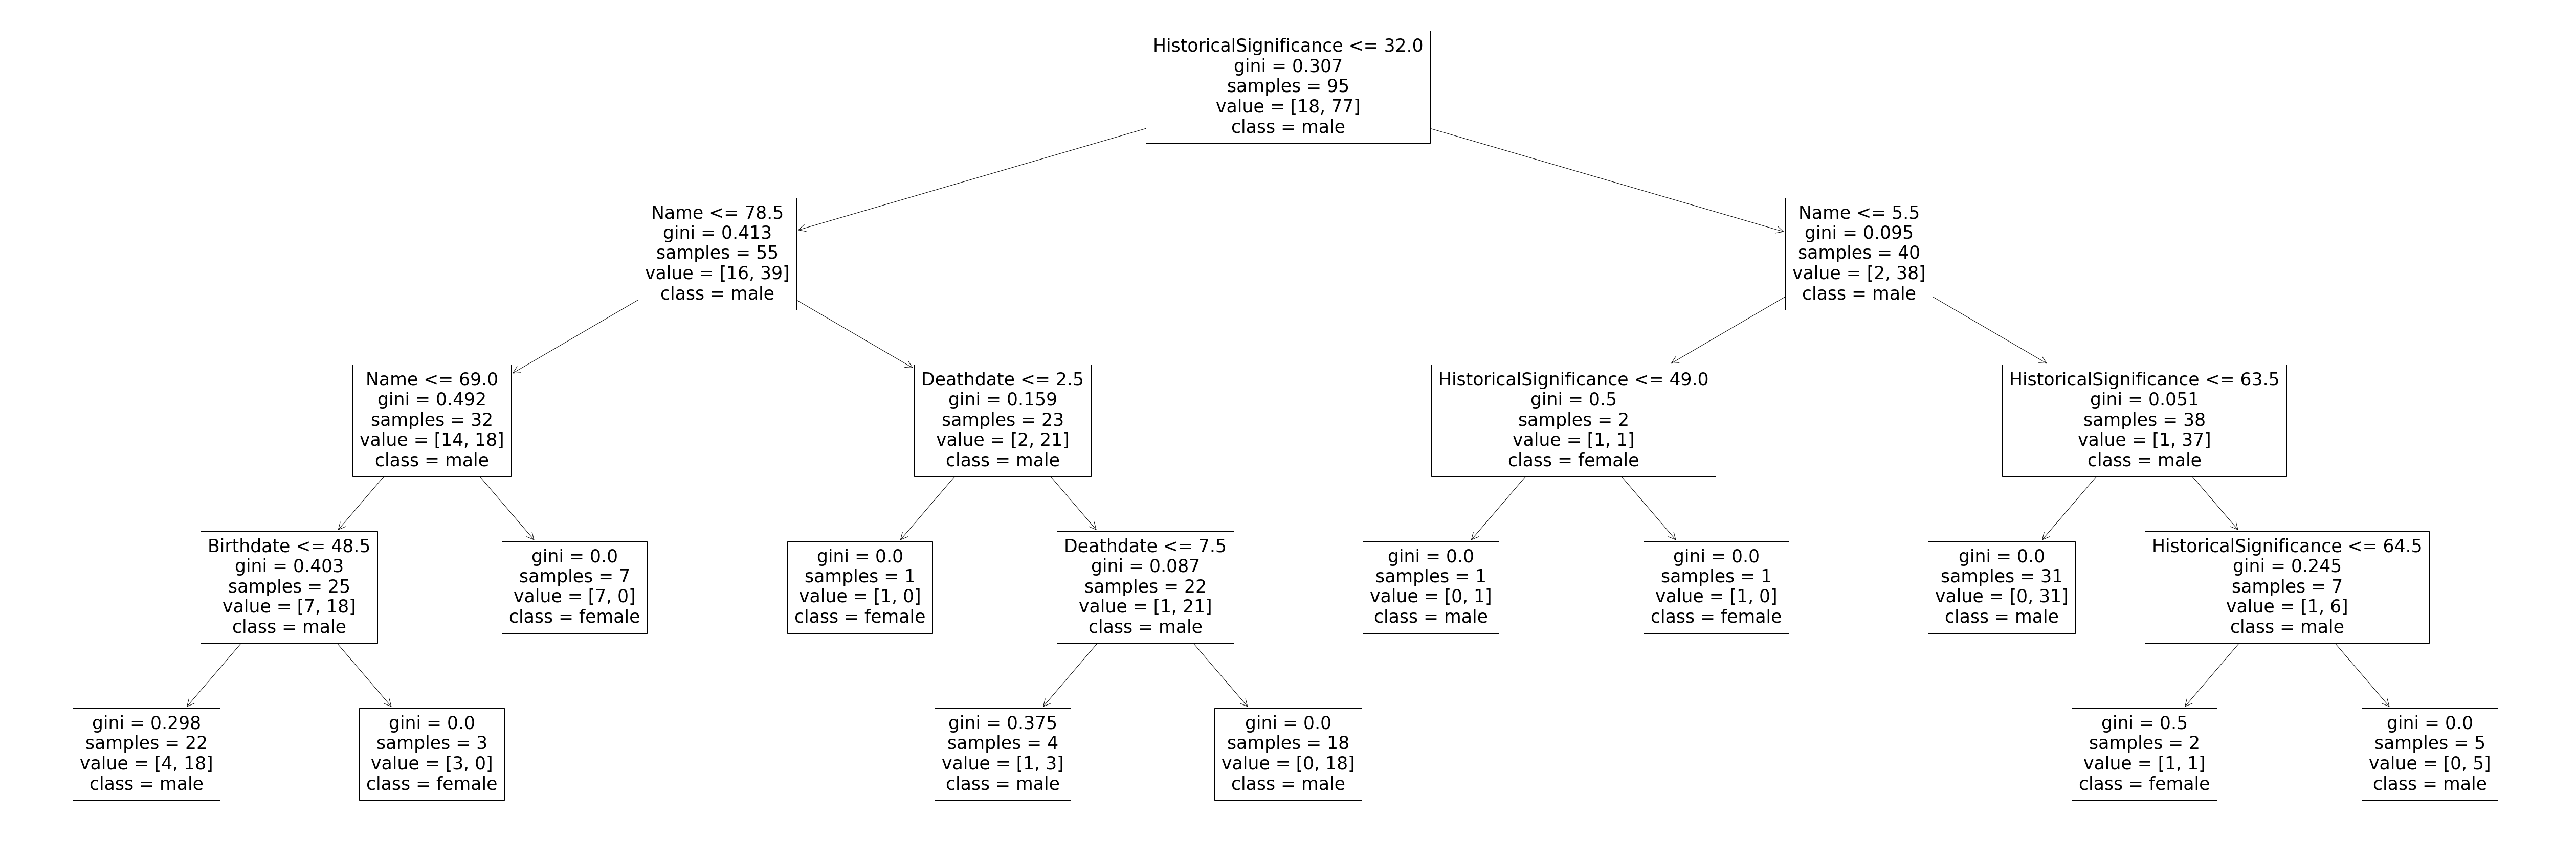

In [25]:
pyplot.figure(figsize=(90, 30))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART,
                       feature_names=nodos.columns[:-1],
                       class_names=codificador_objetivo.classes_)

El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de acierto (_accuracy_) sobre un conjunto de datos de prueba.

In [26]:
#creamos unos nuevos ejemplos para probar arboles de decision
nuevos_ejemplos = pd.DataFrame([['Joseph Wyeth', 'religious writer', 1621, 1751],
                                    ['Lilias Skene', 'Quaker preacher and poet', 1676, 1697]],
                                   columns=nodos.columns[:-2])
nuevos_ejemplos

,Name,HistoricalSignificance,Birthdate,Deathdate
0,Joseph Wyeth,religious writer,1621,1751
1,Lilias Skene,Quaker preacher and poet,1676,1697


In [27]:
predicciones = clasif_CART.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['male', 'female'], dtype=object)

In [28]:
clasif_CART.score(atributos_prueba, objetivo_prueba)

0.8333333333333334

### kNN

_sklearn_ implementa un modelo _kNN_ clasificador como una instancia de la clase `KNeighborsClassifier`. En https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html se puede encontrar una descripción de las distancias actualmente implementadas que se podrían usar.

In [29]:
from sklearn import neighbors

In [30]:
clasif_kNN = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos a considerar
    metric='hamming'  # Distancia de Hamming como métrica de cercanía:
                      # fracción de atributos con valores distintos
)
clasif_kNN.fit(atributos_entrenamiento, objetivo_entrenamiento)

KNeighborsClassifier(metric='hamming')

El método `kneighbors` permite encontrar los (índices de los) $k$ vecinos más cercanos de los ejemplos proporcionados, así como las distancias a las que se encuentran.

In [31]:
distancias, vecinos = clasif_kNN.kneighbors(codificador_atributos.transform(nuevos_ejemplos))

In [32]:
# Vecinos más cercanos y distancia a ellos del primer ejemplo nuevo
print("Primer ejemplo nuevo:")
print(nuevos_ejemplos.iloc[[0]])
print()
print("5 vecinos más cercanos:")
print(pd.DataFrame(codificador_atributos.inverse_transform(atributos_entrenamiento[vecinos[0]]),
                       columns=nodos.columns[:-2],
                       index=vecinos[0]).assign(
    distancia=distancias[0],
    clase=codificador_objetivo.inverse_transform(objetivo_entrenamiento[vecinos[0]])
))

Primer ejemplo nuevo:
           Name HistoricalSignificance  Birthdate  Deathdate
0  Joseph Wyeth       religious writer       1621       1751

5 vecinos más cercanos:
                          Name         HistoricalSignificance Birthdate  \
16           Humphrey Woolrich               religious writer      1633   
17                Joseph Wyeth       religious writer for you      1663   
67                 James Logan  colonial official and scholar      1674   
60  Alexander Skene of Newtyle    local politician and author      1621   
53      George Fox the younger               religious writer      1551   

   Deathdate  distancia clase  
16      1707       0.75  male  
17      1731       0.75  male  
67      1751       0.75  male  
60      1694       0.75  male  
53      1661       0.75  male  


In [33]:
# Vecinos más cercanos y distancia a ellos del segundo ejemplo nuevo
print("Segundo ejemplo nuevo:")
print(nuevos_ejemplos.iloc[[1]])
print()
print("5 vecinos más cercanos:")
print(pd.DataFrame(codificador_atributos.inverse_transform(atributos_entrenamiento[vecinos[1]]),
                       columns=nodos.columns[:-2],
                       index=vecinos[1]).assign(
    distancia=distancias[1],
    clase=codificador_objetivo.inverse_transform(objetivo_entrenamiento[vecinos[1]])
))

Segundo ejemplo nuevo:
           Name    HistoricalSignificance  Birthdate  Deathdate
1  Lilias Skene  Quaker preacher and poet       1676       1697

5 vecinos más cercanos:
                Name            HistoricalSignificance Birthdate Deathdate  \
87      John ap John                     Quaker leader      1625      1697   
38     Grace Chamber                   Quaker minister      1676      1762   
9   Alexander Parker        Quaker preacher and author      1628      1689   
18       David Lloyd  lawyer and politician in America      1656      1731   
55    Benjamin Furly     merchant and religious writer      1636      1714   

    distancia   clase  
87       0.75    male  
38       0.75  female  
9        1.00    male  
18       1.00    male  
55       1.00    male  


El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de aciertos (_accuracy_) sobre un conjunto de datos de prueba.

In [34]:
predicciones = clasif_kNN.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['male', 'male'], dtype=object)

In [35]:
clasif_kNN.score(atributos_prueba, objetivo_prueba)

0.875

### Centralidad de personas más relacionadas

In [36]:
listaGradoCentralidad=pd.DataFrame.from_dict(nx.algorithms.centrality.degree_centrality(graph), 
                       orient='index',
                       columns = ['grado_centralidad'])
print(listaGradoCentralidad)

                            grado_centralidad
Joseph Wyeth                         0.008475
Alexander Skene of Newtyle           0.008475
James Logan                          0.033898
Dorcas Erbery                        0.008475
Lilias Skene                         0.008475
...                                       ...
Thomas Ellwood                       0.067797
William Simpson                      0.008475
Samuel Bownas                        0.008475
John Perrot                          0.059322
Hannah Stranger                      0.016949

[119 rows x 1 columns]


### Centralidad de personas más cercanas

In [37]:
listaCentralidadProximidad=pd.DataFrame.from_dict(nx.closeness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_proximidad'])
print(listaCentralidadProximidad)

                            centralidad_proximidad
Joseph Wyeth                              0.220412
Alexander Skene of Newtyle                0.008475
James Logan                               0.260146
Dorcas Erbery                             0.235332
Lilias Skene                              0.008475
...                                            ...
Thomas Ellwood                            0.302305
William Simpson                           0.193139
Samuel Bownas                             0.159008
John Perrot                               0.286453
Hannah Stranger                           0.236059

[119 rows x 1 columns]


### Centralidad de puentes

In [38]:
listaCentralidadIntermedia=pd.DataFrame.from_dict(nx.algorithms.centrality.betweenness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_intermedio'])
print(listaCentralidadIntermedia)

                            centralidad_intermedio
Joseph Wyeth                              0.000000
Alexander Skene of Newtyle                0.000000
James Logan                               0.026945
Dorcas Erbery                             0.000000
Lilias Skene                              0.000000
...                                            ...
Thomas Ellwood                            0.046191
William Simpson                           0.000000
Samuel Bownas                             0.000000
John Perrot                               0.028296
Hannah Stranger                           0.000000

[119 rows x 1 columns]


In [39]:
#Lo que vamos a hacer ahora es modificar el dataset que tenemos, añadiendole los diferentes
#valores de centralidad que hemos obtenido de nuestro grafo en cuestion, para ello unimos las listas
data=[listaGradoCentralidad,listaCentralidadIntermedia,listaCentralidadProximidad]
centralidadesConcatenadas=pd.concat(data, axis=1, join='inner')
print(centralidadesConcatenadas)

                            grado_centralidad  centralidad_intermedio  \
Joseph Wyeth                         0.008475                0.000000   
Alexander Skene of Newtyle           0.008475                0.000000   
James Logan                          0.033898                0.026945   
Dorcas Erbery                        0.008475                0.000000   
Lilias Skene                         0.008475                0.000000   
...                                       ...                     ...   
Thomas Ellwood                       0.067797                0.046191   
William Simpson                      0.008475                0.000000   
Samuel Bownas                        0.008475                0.000000   
John Perrot                          0.059322                0.028296   
Hannah Stranger                      0.016949                0.000000   

                            centralidad_proximidad  
Joseph Wyeth                              0.220412  
Alexander Skene o

In [40]:
#Escribimos las centralidades en un csv para poder concatenarlas a la lista de los nodos
centralidadesConcatenadas.to_csv('centralidades.csv',header=None)   
#la volvemos a leer para que tenga un buen indice
centralidades_csv=pd.read_csv('centralidades.csv',header=None,
                 names=['Name','grado_centralidad','centralidad_intermedio','centralidad_proximidad'])
print(centralidades_csv)

                           Name  grado_centralidad  centralidad_intermedio  \
0                  Joseph Wyeth           0.008475                0.000000   
1    Alexander Skene of Newtyle           0.008475                0.000000   
2                   James Logan           0.033898                0.026945   
3                 Dorcas Erbery           0.008475                0.000000   
4                  Lilias Skene           0.008475                0.000000   
..                          ...                ...                     ...   
114              Thomas Ellwood           0.067797                0.046191   
115             William Simpson           0.008475                0.000000   
116               Samuel Bownas           0.008475                0.000000   
117                 John Perrot           0.059322                0.028296   
118             Hannah Stranger           0.016949                0.000000   

     centralidad_proximidad  
0                  0.220412  
1  

In [41]:
#Una vez tenemos las centralidades concatenadas vamos a hacer lo mismo para concatenarlo a los nodos
#para concatenarlos hacemos un left join para tener todos los atributos de la izquierda y le sumamos los de la derecha
nodos_centralidades=pd.merge(nodos,centralidades_csv,how='left',left_on='Name',right_on='Name')

### Nuestro nuevo dataset es nodosConCentralidades

In [42]:
nodos_centralidades = nodos_centralidades[['Name','HistoricalSignificance','Birthdate','Deathdate','grado_centralidad',
                                               'centralidad_intermedio','centralidad_proximidad','ID','Gender']]
nodos_centralidades.head(10)

,Name,HistoricalSignificance,Birthdate,Deathdate,grado_centralidad,centralidad_intermedio,centralidad_proximidad,ID,Gender
0,Joseph Wyeth,religious writer for you,1663,1731,0.008475,0.000000,0.220412,10013191,male
1,Alexander Skene of Newtyle,local politician and author,1621,1694,0.008475,0.000000,0.008475,10011149,male
2,James Logan,colonial official and scholar,1674,1751,0.033898,0.026945,0.260146,10007567,male
3,Dorcas Erbery,Quaker preacher,1656,1659,0.008475,0.000000,0.235332,10003983,female
4,Lilias Skene,Quaker preacher and poet,1626,1697,0.008475,0.000000,0.008475,10011152,male
5,William Mucklow,religious writer for magazine,1630,1713,0.008475,0.000000,0.264647,10008595,male
6,Thomas Salthouse,Quaker preacher and writer,1630,1691,0.016949,0.000000,0.279135,10010643,male
7,William Dewsbury,Quaker activist,1621,1688,0.025424,0.000000,0.268362,10003478,male
8,John Audland,Quaker preacher,1630,1664,0.050847,0.041649,0.278120,10000411,male
9,Richard Claridge,Quaker minister and schoolmaster,1649,1723,0.016949,0.026945,0.259265,10002469,male


In [43]:
atributos_centralidades = nodos_centralidades.loc[:,'Name':'centralidad_proximidad']
objetivo_centralidades = nodos_centralidades['Gender']

In [44]:
# Para realizar una codificación de los datos, se crea una instancia del tipo de
# codificación pretendida y se ajusta a los datos disponibles mediante el método fit.

codificador_atributos_centralidades = preprocessing.OrdinalEncoder()
codificador_atributos_centralidades.fit(atributos_centralidades)

#Con este comando miras los valores que puede haber cuando el atributo ya esta codificado
#print(codificador_atributos_centralidades.categories_)

OrdinalEncoder()

In [45]:
# Una vez ajustado el codificador, el método transform permite codificar los
# valores de los atributos
atributos_codificados_centralidades = codificador_atributos_centralidades.transform(atributos_centralidades)
#print(atributos_codificados)

In [46]:
# El codificador adecuado para la variable objetivo es LabelEncoder, que trabaja
# con una lista o array unidimensional de sus valores
codificador_objetivo_centralidades = preprocessing.LabelEncoder()
# El método fit_transform ajusta la codificación y la aplica a los datos justo
# a continuación
objetivo_codificado_centralidades = codificador_objetivo_centralidades.fit_transform(objetivo_centralidades)

In [47]:
# Clases detectadas por el codificador para la variable objetivo
print(codificador_objetivo_centralidades.classes_)

['female' 'male']


In [48]:
#1 es male, 0 es female
print(objetivo_codificado_centralidades)
# Las respuestas predichas por los modelos estarán codificadas, pero el codificador
# también permite descodificarlas
print(codificador_objetivo_centralidades.inverse_transform([1, 0, 1]))

[1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 0]
['male' 'female' 'male']


In [49]:
# Cantidad total de ejemplos
#print(nodos.shape[0])
# Frecuencia total de cada clase de aceptabilidad (porcentaje de cada valor objetivo en nuestro conjunto)
print(pd.Series(objetivo).value_counts(normalize=True))

male      0.815126
female    0.184874
Name: Gender, dtype: float64


In [50]:
(atributos_entrenamiento_centralidades, atributos_prueba_centralidades,
 objetivo_entrenamiento_centralidades, objetivo_prueba_centralidades) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados_centralidades, objetivo_codificado_centralidades,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=12345,
        # Tamaño del conjunto de prueba
        test_size=.20,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado_centralidades)

In [51]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de pruebas requeridos:', 119 * .20)
print('Filas del array de atributos de prueba:', atributos_prueba_centralidades.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba_centralidades))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pd.Series(
        codificador_objetivo_centralidades.inverse_transform(objetivo_prueba_centralidades)
      ).value_counts(normalize=True))

Cantidad de ejemplos de pruebas requeridos: 23.8
Filas del array de atributos de prueba: 24
Longitud del vector de objetivos de prueba: 24
Proporción de clases en el vector de objetivos de prueba:
male      0.833333
female    0.166667
dtype: float64


In [52]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de entrenamiento requeridos:', 119 * .80)
print('Filas del array de atributos de entrenamiento:', atributos_entrenamiento_centralidades.shape[0])
print('Longitud del vector de objetivos de entrenamiento:', len(objetivo_entrenamiento_centralidades))
print('Proporción de clases en el vector de objetivos de entrenamiento:')
print(pd.Series(# Comprobamos que el 
        codificador_objetivo_centralidades.inverse_transform(objetivo_entrenamiento_centralidades)
      ).value_counts(normalize=True))

Cantidad de ejemplos de entrenamiento requeridos: 95.2
Filas del array de atributos de entrenamiento: 95
Longitud del vector de objetivos de entrenamiento: 95
Proporción de clases en el vector de objetivos de entrenamiento:
male      0.810526
female    0.189474
dtype: float64


Para realizar aprendizaje supervisado en _sklearn_, basta crear una instancia de la clase de objetos que implemente el modelo que se quiera utilizar (_naive_ Bayes, árboles de decisión, _kNN_, etc.).

Cada una de estas instancias dispondrá de los siguientes métodos:
* El método `fit` permite entrenar el modelo, dados __por separado__ el conjunto de ejemplos de entrenamiento y la clase de cada uno de estos ejemplos.
* El método `predict` permite clasificar un nuevo ejemplo una vez entrenado el modelo.
* El método `score` calcula el rendimiento del modelo, dados __por separado__ el conjunto de ejemplos de prueba y la clase de cada uno de estos ejemplos.

### Random Forest

In [53]:
#Hasta aqui lo he hemos hecho ha sido leer del csv los datos, meterlos en 1 conjunto de entrenamiento (80%)
#y otro de pruebas(20%), despues hemos codificado, estos datos para que sean utilizables por los modelos
#y ahora vamos a definir los modelos para hacer el entrenamiento de la maquina.
#El primero a utilizar será Random Forest
#print(atributos_entrenamiento)
#print(objetivo_entrenamiento)
#Aqui hemos tenido que arreglar el dataset porque había algunas incongruencias, y hemos tenido que cambiar algunos datos

In [54]:
#definimos nuestra instancia del random forest
forest_centralidades = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
#entrenamos nuestro modelo
forest_centralidades.fit(atributos_entrenamiento_centralidades, objetivo_entrenamiento_centralidades)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [55]:
#predecimos medianto los atributos a testear sus correspondientes generos para cada atributo
objetivo_predicho_centralidades=forest_centralidades.predict(atributos_prueba_centralidades)
print(objetivo_predicho_centralidades)

[1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1]


In [56]:
forest_centralidades.score(atributos_prueba_centralidades,objetivo_prueba_centralidades)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(objetivo_prueba, objetivo_predicho))
print("Accuracy centralidades:",metrics.accuracy_score(objetivo_prueba_centralidades, objetivo_predicho_centralidades))

Accuracy: 0.875
Accuracy centralidades: 0.6666666666666666


### Árboles de decisión

_sklearn_ implementa los árboles de decisión clasificadores como instancias de la clase `DecisionTreeClassifier`.

In [57]:
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en cada nodo la mejor
# combinación atributo-umbral para dividir el conjunto de ejemplos asociado al nodo, no considera
# los atributos en orden, sino que los reordena aleatoriamente. Esto puede hacer que se obtenga
# un árbol distinto cada vez que se ejecuta el código, ya que produce como efecto que los empates
# en esa búsqueda se deshacen de forma aleatoria.

# Para evitar el sobreajuste del árbol a los ejemplos de entrenamiento vamos a limitar la
# profundidad del árbol

clasif_CART_centralidades = tree.DecisionTreeClassifier(
    max_depth=4,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART_centralidades.fit(atributos_entrenamiento_centralidades, objetivo_entrenamiento_centralidades)

DecisionTreeClassifier(max_depth=4, random_state=54321)

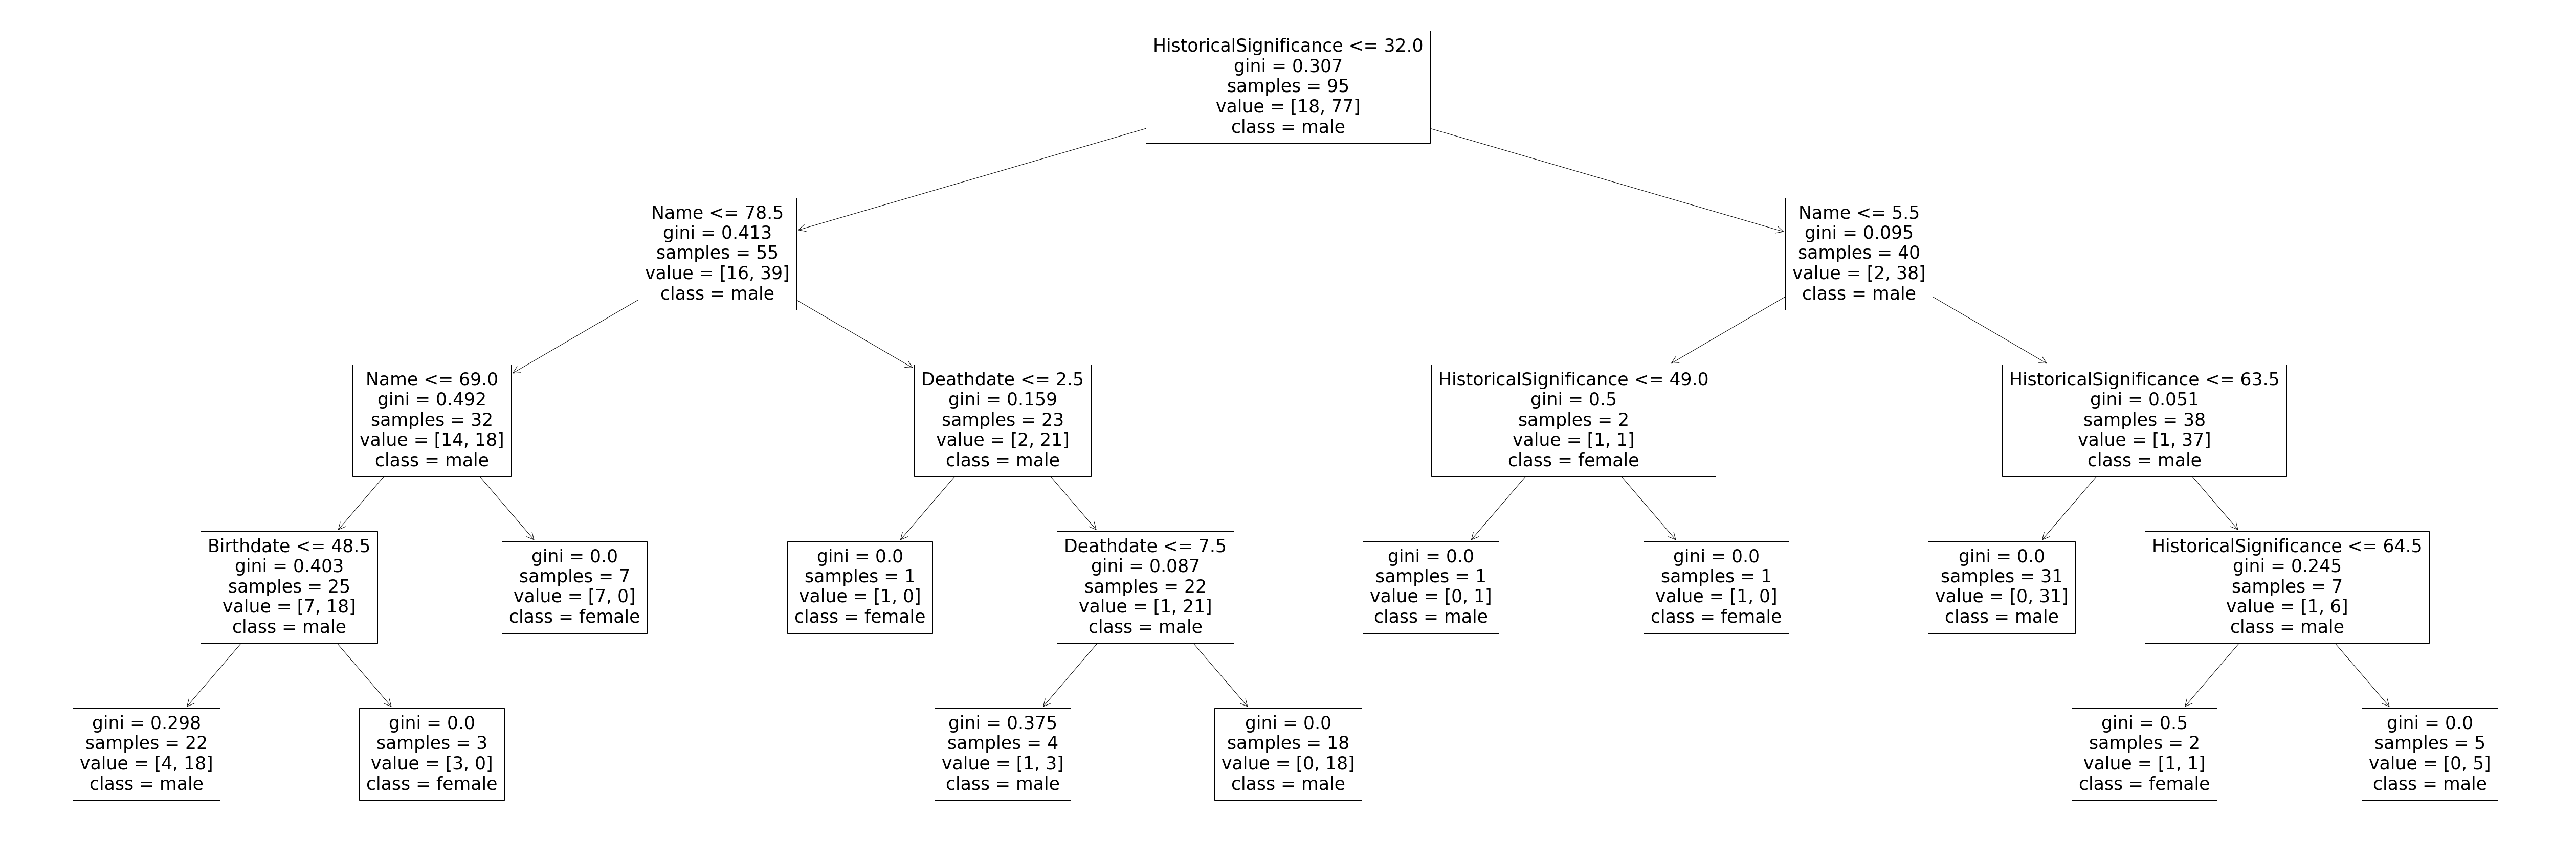

In [58]:
pyplot.figure(figsize=(90, 30))  # Anchura y altura del gráfico
árbol_centralidades = tree.plot_tree(clasif_CART,
                       feature_names=nodos_centralidades.columns[:-1],
                       class_names=codificador_objetivo_centralidades.classes_)

El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de acierto (_accuracy_) sobre un conjunto de datos de prueba.

In [59]:
#creamos unos nuevos ejemplos para probar arboles de decision
nuevos_ejemplos_centralidades = pd.DataFrame([['Joseph Wyeth', 'religious writer', 1621, 1751, 0.1101694915254237, 0.0, 0.2721816756137282],
                                    ['Lilias Skene', 'Quaker preacher and poet', 1676, 1697, 0.0423728813559322, 0.0, 0.2646472347662893]],
                                   columns=nodos_centralidades.columns[:-2])
nuevos_ejemplos_centralidades

,Name,HistoricalSignificance,Birthdate,Deathdate,grado_centralidad,centralidad_intermedio,centralidad_proximidad
0,Joseph Wyeth,religious writer,1621,1751,0.110169,0.0,0.272182
1,Lilias Skene,Quaker preacher and poet,1676,1697,0.042373,0.0,0.264647


In [61]:
predicciones_centralidades = clasif_CART_centralidades.predict(codificador_atributos_centralidades.transform(nuevos_ejemplos_centralidades))
codificador_objetivo_centralidades.inverse_transform(predicciones_centralidades)

array(['male', 'female'], dtype=object)

In [63]:
print("Accuracy:",clasif_CART.score(atributos_prueba, objetivo_prueba))
print("Accuracy centralidades:",clasif_CART_centralidades.score(atributos_prueba_centralidades, objetivo_prueba_centralidades))

Accuracy: 0.8333333333333334
Accuracy centralidades: 0.5833333333333334


### kNN

_sklearn_ implementa un modelo _kNN_ clasificador como una instancia de la clase `KNeighborsClassifier`. En https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html se puede encontrar una descripción de las distancias actualmente implementadas que se podrían usar.

In [64]:
clasif_kNN_centralidades = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos a considerar
    metric='hamming'  # Distancia de Hamming como métrica de cercanía:
                      # fracción de atributos con valores distintos
)
clasif_kNN_centralidades.fit(atributos_entrenamiento_centralidades, objetivo_entrenamiento_centralidades)

KNeighborsClassifier(metric='hamming')

El método `kneighbors` permite encontrar los (índices de los) $k$ vecinos más cercanos de los ejemplos proporcionados, así como las distancias a las que se encuentran.

In [65]:
distancias, vecinos = clasif_kNN_centralidades.kneighbors(codificador_atributos_centralidades.transform(nuevos_ejemplos_centralidades))

In [67]:
# Vecinos más cercanos y distancia a ellos del primer ejemplo nuevo
print("Primer ejemplo nuevo:")
print(nuevos_ejemplos_centralidades.iloc[[0]])
print()
print("5 vecinos más cercanos:")
print(pd.DataFrame(codificador_atributos_centralidades.inverse_transform(atributos_entrenamiento_centralidades[vecinos[0]]),
                       columns=nodos_centralidades.columns[:-2],
                       index=vecinos[0]).assign(
    distancia=distancias[0],
    clase=codificador_objetivo_centralidades.inverse_transform(objetivo_entrenamiento_centralidades[vecinos[0]])
))

Primer ejemplo nuevo:
           Name HistoricalSignificance  Birthdate  Deathdate  \
0  Joseph Wyeth       religious writer       1621       1751   

   grado_centralidad  centralidad_intermedio  centralidad_proximidad  
0           0.110169                     0.0                0.272182  

5 vecinos más cercanos:
                          Name       HistoricalSignificance Birthdate  \
16           Humphrey Woolrich             religious writer      1633   
3             William Dewsbury              Quaker activist      1621   
17                Joseph Wyeth     religious writer for you      1663   
60  Alexander Skene of Newtyle  local politician and author      1621   
53      George Fox the younger             religious writer      1551   

   Deathdate grado_centralidad centralidad_intermedio centralidad_proximidad  \
16      1707          0.008475                    0.0               0.008475   
3       1688          0.025424                    0.0               0.268362   
17 

In [68]:
# Vecinos más cercanos y distancia a ellos del segundo ejemplo nuevo
print("Segundo ejemplo nuevo:")
print(nuevos_ejemplos_centralidades.iloc[[1]])
print()
print("5 vecinos más cercanos:")
print(pd.DataFrame(codificador_atributos_centralidades.inverse_transform(atributos_entrenamiento_centralidades[vecinos[1]]),
                       columns=nodos_centralidades.columns[:-2],
                       index=vecinos[1]).assign(
    distancia=distancias[1],
    clase=codificador_objetivo_centralidades.inverse_transform(objetivo_entrenamiento_centralidades[vecinos[1]])
))

Segundo ejemplo nuevo:
           Name    HistoricalSignificance  Birthdate  Deathdate  \
1  Lilias Skene  Quaker preacher and poet       1676       1697   

   grado_centralidad  centralidad_intermedio  centralidad_proximidad  
1           0.042373                     0.0                0.264647  

5 vecinos más cercanos:
                  Name            HistoricalSignificance Birthdate Deathdate  \
87        John ap John                     Quaker leader      1625      1697   
85     William Mucklow     religious writer for magazine      1630      1713   
5   William Coddington  merchant and official in America      1601      1678   
38       Grace Chamber                   Quaker minister      1676      1762   
80        Leonard Fell      Quaker missionary and writer      1624      1701   

   grado_centralidad centralidad_intermedio centralidad_proximidad  distancia  \
87          0.008475                    0.0               0.200743   0.714286   
85          0.008475            

El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de aciertos (_accuracy_) sobre un conjunto de datos de prueba.

In [69]:
predicciones_centralidades = clasif_kNN_centralidades.predict(codificador_atributos_centralidades.transform(nuevos_ejemplos_centralidades))
codificador_objetivo_centralidades.inverse_transform(predicciones_centralidades)

array(['male', 'male'], dtype=object)

In [70]:
print("Accuracy:",clasif_kNN.score(atributos_prueba,objetivo_prueba))
print("Accuracy centralidades:",clasif_kNN_centralidades.score(atributos_prueba_centralidades, objetivo_prueba_centralidades))

Accuracy: 0.875
Accuracy centralidades: 0.8333333333333334


### Gráfica comparativa de precisión

In [72]:
import numpy as np

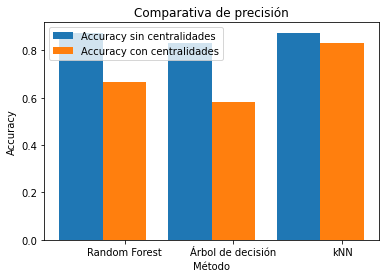

In [91]:
serie_1 = [metrics.accuracy_score(objetivo_prueba, objetivo_predicho), clasif_CART.score(atributos_prueba, objetivo_prueba), clasif_kNN.score(atributos_prueba,objetivo_prueba)]
serie_2 = [metrics.accuracy_score(objetivo_prueba_centralidades, objetivo_predicho_centralidades), clasif_CART_centralidades.score(atributos_prueba_centralidades, objetivo_prueba_centralidades), clasif_kNN_centralidades.score(atributos_prueba_centralidades,objetivo_prueba_centralidades)]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.4
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Accuracy sin centralidades')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Accuracy con centralidades')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Random Forest', 'Árbol de decisión', 'kNN'))

plt.ylabel('Accuracy')
plt.xlabel('Método')
plt.title('Comparativa de precisión')
 
plt.show()